In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 23 15:33:48 2021

@author: hannohennighausen
"""

import hexalattice.hexalattice as hex
import numpy as np
import matplotlib.pyplot as plt
from pathlib import  Path
import imageio as iio
import pandas as pd
import seaborn as sns
import glob

In [16]:
Frz

NameError: name 'Frz' is not defined

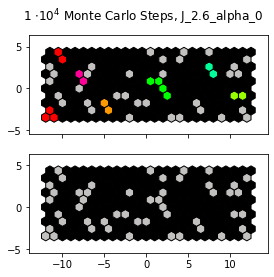

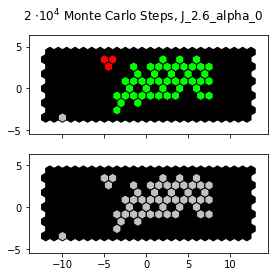

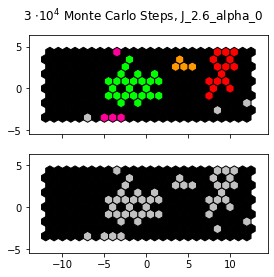

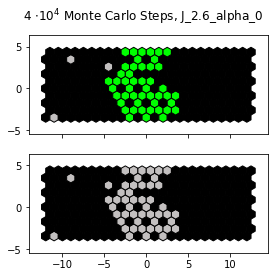

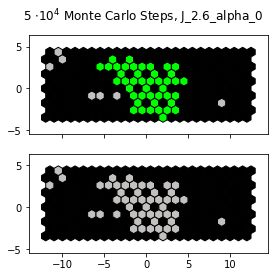

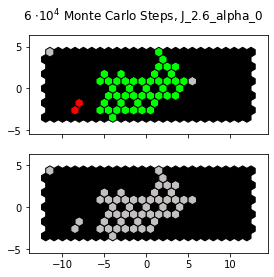

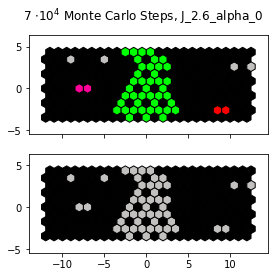

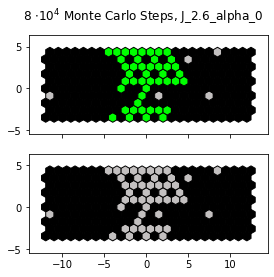

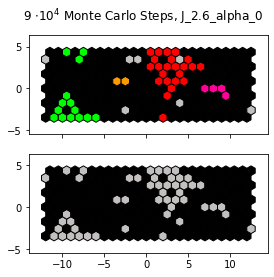

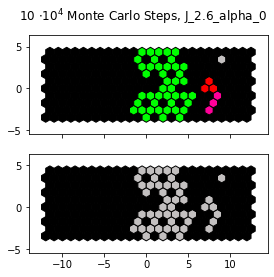

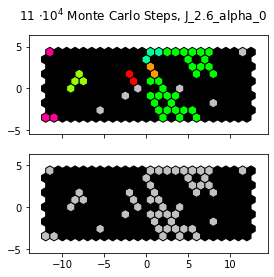

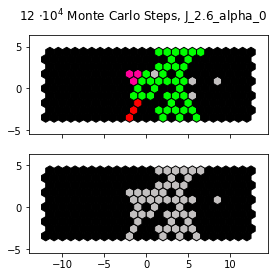

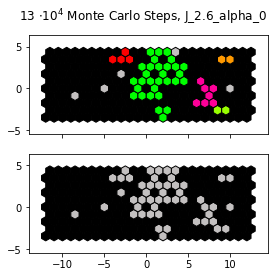

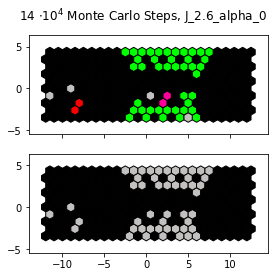

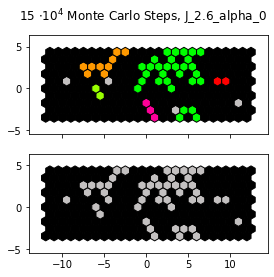

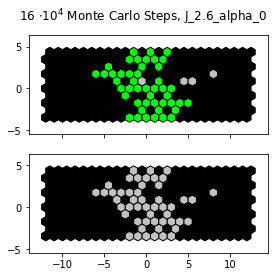

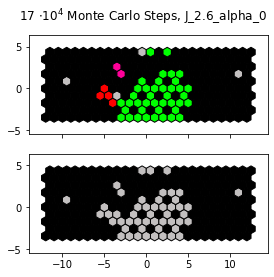

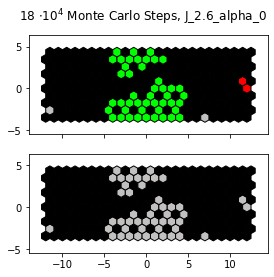

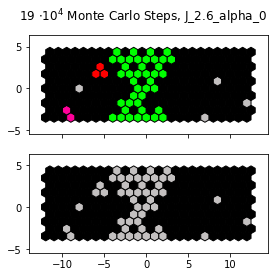

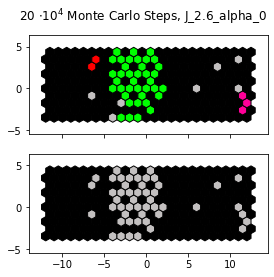

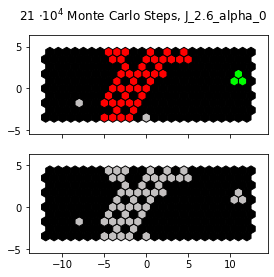

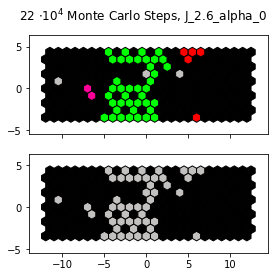

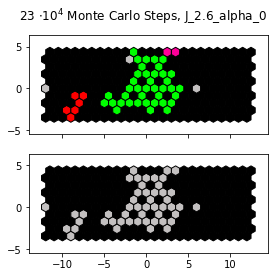

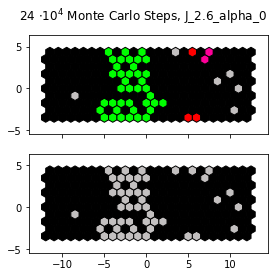

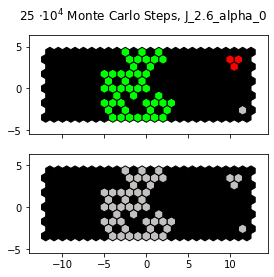

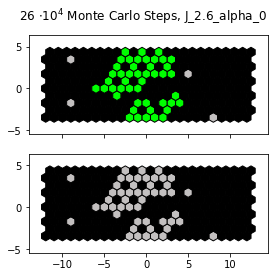

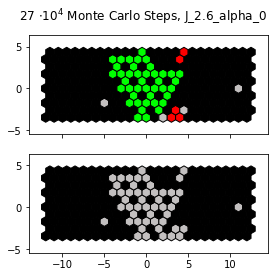

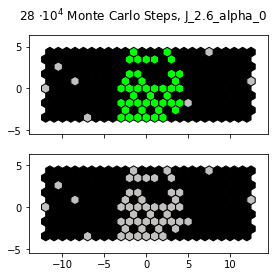

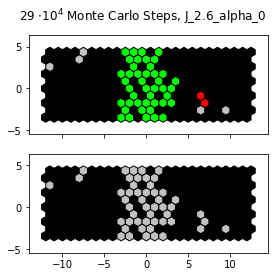

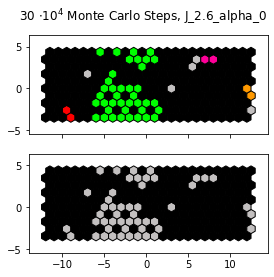

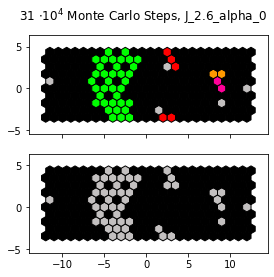

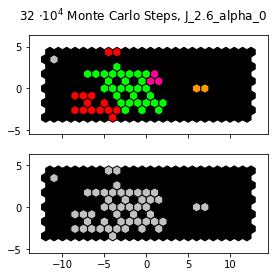

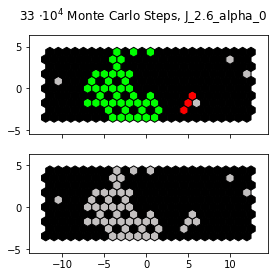

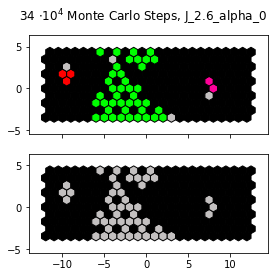

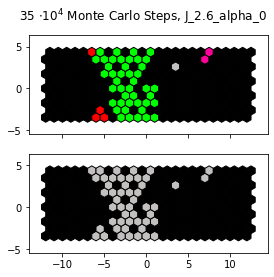

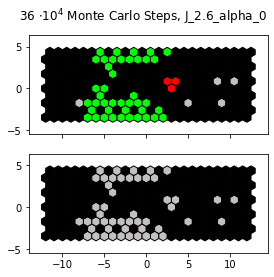

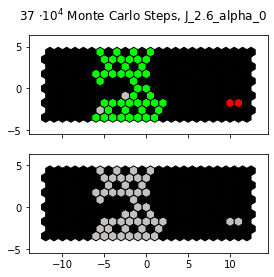

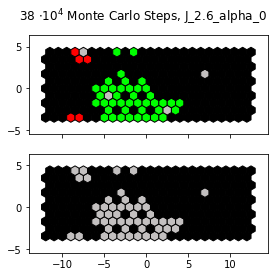

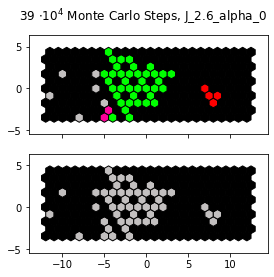

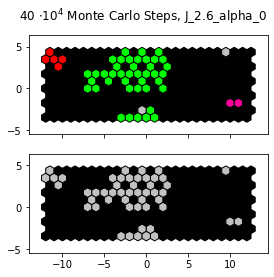

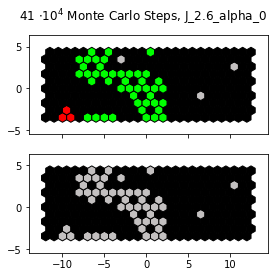

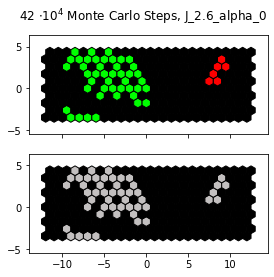

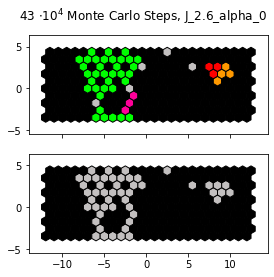

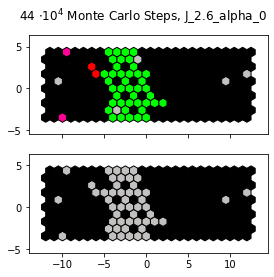

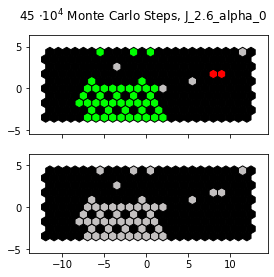

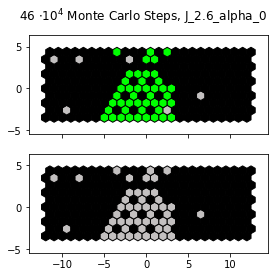

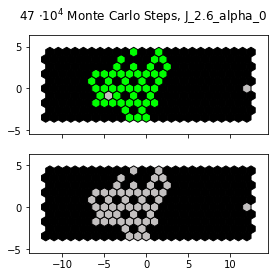

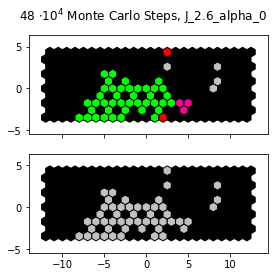

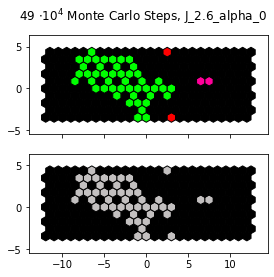

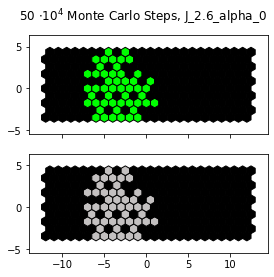

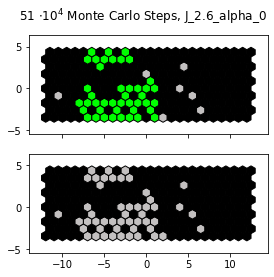

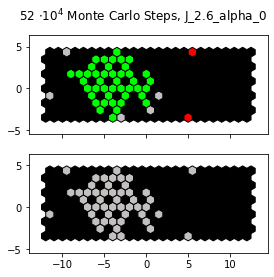

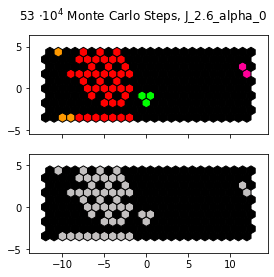

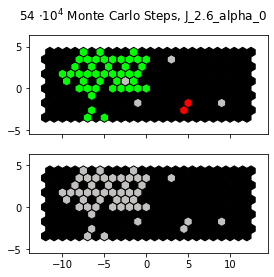

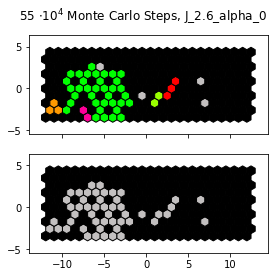

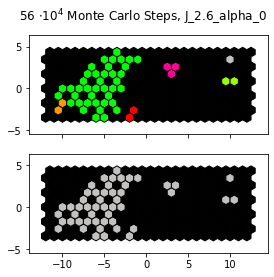

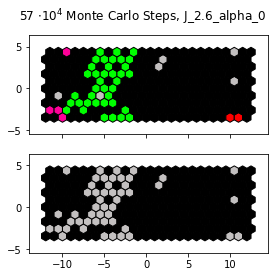

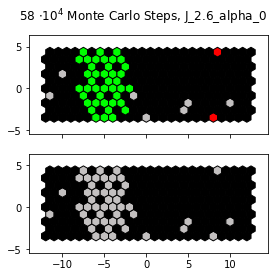

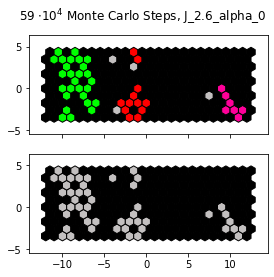

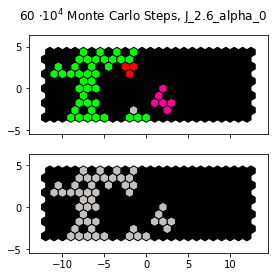

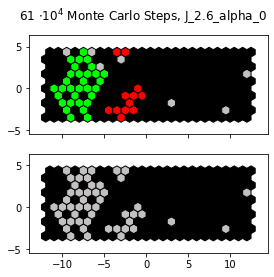

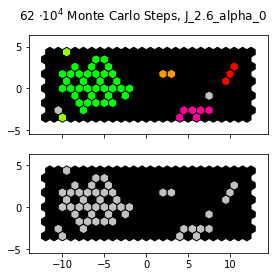

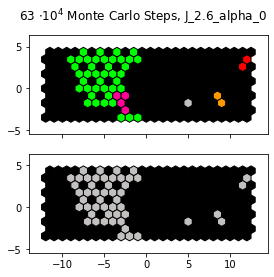

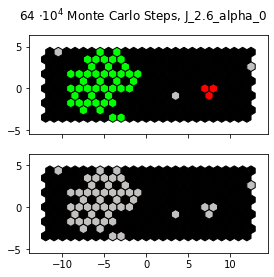

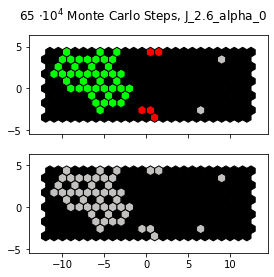

KeyboardInterrupt: 

In [17]:
# %%capture
color_scale=[[0,0,1],[0,1,0],[1,0,0],[1,0,0.6],[1,0.6,0],[0.6,1,0],[0,1,0.6],[0,0.6,1],[0.6,0,1],[1,1,0.6],[1,0.6,1],[0.6,1,1],[0,0,0.6],[0,0.6,0],[0.6,0,0],
             [0,0,0.2],[0,0.2,0],[0.2,0,0],[1,0,0.2],[1,0.2,0],[0.2,1,0],[0,1,0.2],[0,0.2,1],[0.2,0,1],[1,1,0.2],[1,0.2,1],[0.2,1,1],
             [0,0.4,0.2],[0,0.2,0.4],[0.2,0.4,0],[0.4,0,0.2],[0.4,0.2,0],[0.2,0.4,0],[0.4,0.4,0.2],[0.4,0.2,0.4],[0.2,0.4,0.4],[0.4,1,0.2],[0.4,0.2,1],[0.2,1,0.4]]
alpha = 0
density = 0.2
run = 8
index = 1
off = 0.03
FrzB = 0
for run in [20]:
    for J in [2.6]:
        for titration in [1]:
            beta = 2*J
            # labels = np.loadtxt(f'/scratch2/hannohennighausen/Parameter_sweep/rectangular_outputlabels_{J}_{alpha}_0.2_11.txt',dtype=int,skiprows=1)
            labels = np.loadtxt(f'/home/subraman/Documents/Github_projects/frz_lattice_simulation/{index}_dFrzB_labels_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}.txt',dtype=int,skiprows=1)
            Frz = np.loadtxt(f'/home/subraman/Documents/Github_projects/frz_lattice_simulation/{index}_dFrzB_flags_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}.txt',dtype=int,skiprows=1)
            Path(f'/home/subraman/Documents/Github_projects/frz_lattice_simulation/{index}_dFrzB_labels_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}').mkdir( exist_ok=True)
            Nx,Ny=np.loadtxt(f'/home/subraman/Documents/Github_projects/frz_lattice_simulation/{index}_dFrzB_labels_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}.txt',dtype=int,max_rows=1)
            saved_steps = int(labels.shape[0]/3)
  
            for step in range(0,saved_steps):
                
#                 if step in [1,10,49,79]:
#                     cluster_size = np.bincount(labels[step*3])
#                     cluster_size_distribution = np.bincount(cluster_size[1:])
#                     plt.figure()
#                     plt.bar(np.arange(cluster_size_distribution.size), cluster_size_distribution)
#                     plt.ylim((0,55))
#                     plt.suptitle('cluster size distribution')
#                     plt.title(f'J={J}, alpha={alpha},density={density}')
#                     plt.savefig(f'/home/subraman/Documents/Github_projects/frz_lattice_simulation/Python_analysis/hist_{step}_{J}_{alpha}_{density}.svg')
#                     plt.show()
                
                colors_labels = np.zeros([int(Nx)*int(Ny),3])
                coloring_labels = np.zeros([int(Nx)*int(Ny),3])
                colors_Frz=np.zeros([int(Nx)*int(Ny),3])
                i=0
                j=0
                ii=0
                
                for x in labels[step*3+1]:
                    if labels[step*3,j]==0:
                        coloring_labels[x]=[195/255,192/255,192/255] 
                    else:
                        coloring_labels[x]=color_scale[labels[step*3,j]%39]
                    j+=1
                fig, axs = plt.subplots(2,sharex=(True))
                # plt.figure(figsize=(20,15))
                hex_centers, _ = hex.create_hex_grid(nx= int(Nx),ny=int(Ny), face_color=coloring_labels,do_plot=True,h_ax=axs[0])
                centers_x = hex_centers[:, 0]
                centers_x = hex_centers[:, 1]
                fig.suptitle(f'{(step+1)} $\cdot 10^4$ Monte Carlo Steps, J_{J}_alpha_{alpha}')
                for x in labels[step*3+1]:
            
                    # else:
                    #     coloring_labels[x]=[195/255,192/255,192/255]
                        # labels_name[x]=labels[0,i]
                    if Frz[step,ii]==0:
                        colors_Frz[x]=[195/255,192/255,192/255]  
                    elif Frz[step,ii]==1:
                        colors_Frz[x]=[0, 1, 0]
                    elif Frz[step,ii]==2:
                        colors_Frz[x]=[0, 0, 1]
                    elif Frz[step,ii]==3:
                        colors_Frz[x]=[1, 0, 0]
                    ii+=1
                    
            
                # plt.figure(figsize=(20,15))
                
                hex_centers, axs[1] = hex.create_hex_grid(nx= int(Nx),ny=int(Ny), face_color=colors_Frz,do_plot=True,h_ax=axs[1])
                centers_x = hex_centers[:, 0]
                centers_x = hex_centers[:, 1]
                
                # plt.title(f'{step}')
                plt.savefig(f'/home/subraman/Documents/Github_projects/frz_lattice_simulation/{index}_dFrzB_labels_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}/Frz_B_{step}.jpg')
                #plt.savefig(f'D:/Hanno/Physics/Marburg/Murray/frz_lattice_model/rand_grid_19899+{row}.png')
                # plt.savefig(f'{counter}_labels_{step}_ {J}_{alpha}_{density}.svg')
            
                plt.show()
            


%%capture
images=[]
for step in range(1,10,5):
    print(step)
    im = iio.imread(f"/home/subraman/Documents/Github_projects/frz_lattice_simulation/{index}_dFrzB_labels_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}/Frz_B_{step}.jpg");
    images.append(im);
iio.mimsave(f'/home/subraman/Documents/Github_projects/frz_lattice_simulation/{index}_dFrzB_labels_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}/Frz_B_simulations.gif', images, duration=0.5);



In [18]:
# %%capture
# Count number of particles in the largest cluster

N = density*Nx*Ny
n = np.array([])
c = np.array([])
saved_steps = int(labels.shape[0]/3)
  
for step in range(0,saved_steps):
# Choose a row to plot (e.g. the first row)
    l = labels[step*3][labels[step*3]!=0]
    bins = np.arange(0, max(l), 1)
    hist, bins = np.histogram(l,bins)
    max_val = np.max(hist)
    n = np.append(n,max_val)
    c = np.append(c,np.max(np.unique(l)))
# Create histogram
plt.plot(n/N)

# Add title and axis labels
plt.title(f"Time series J= {J}, beta = {round(beta,2)}, Num_FrzB = {FrzB}")
plt.xlabel("Time")
plt.ylabel("Number of particles in the largest cluster")
plt.ylim([0, 1])
plt.savefig(f'/home/subraman/Documents/Github_projects/frz_lattice_simulation/{index}_dFrzB_labels_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}/Order_parameter_time_series.pdf')

# Show the plot
plt.show()


# Number of clusters
plt.plot(c)
plt.title(f"Time series J= {J}, beta = {round(beta,2)}, Num_FrzB = {FrzB}")
plt.xlabel("Time")
plt.ylabel("Number of clusters")
plt.ylim([0, 70])
plt.savefig(f'/home/subraman/Documents/Github_projects/frz_lattice_simulation/{index}_dFrzB_labels_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}/Number_clusters_time_series.pdf')

# Show the plot
plt.show()


ValueError: zero-size array to reduction operation maximum which has no identity

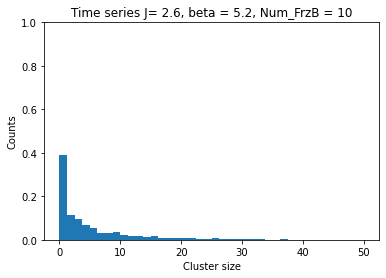

In [22]:
import collections
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []

for step in range(0,saved_steps):
    l = labels[step*3][labels[step*3]!=0] 
    # Choose a row to plot (e.g. the first row)
    counter = collections.Counter(l)
    l2, frequencies = zip(*counter.items())
    x.append(l2)
    y.append(frequencies)

# # Flatten the arrays using np.concatenate()
x = np.concatenate(x)
y = np.concatenate(y)
# n, bins, patches = plt.hist(y, bins=40, density=False)
bins = np.linspace(0,N,len(n)+1)
normalized_counts = n / len(y)

# Plot the normalized histogram
plt.bar(bins[:-1], normalized_counts, width=(bins[1]-bins[0]), align='edge')

# plt.hist(y)
plt.xlabel('Cluster size')
plt.ylabel('Counts')
plt.title(f"Time series J= {J}, beta = {round(beta,2)}, Num_FrzB = {FrzB}")
plt.ylim([0,1])
plt.savefig(f'/home/subraman/Documents/Github_projects/frz_lattice_simulation/{index}_dFrzB_labels_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}/cluster_size_distribution.pdf')

plt.show()



In [446]:
# Calculate energies


2091

In [428]:
normalized_counts = n / len(y)
normalized_counts

array([9.38307030e-01, 1.33907221e-02, 0.00000000e+00, 4.78240077e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.78240077e-04, 3.34768054e-03,
       5.73888092e-03, 1.09995218e-02, 2.10425634e-02, 6.21712099e-03])

(array([6., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  0. ,  36.7,  73.4, 110.1, 146.8, 183.5, 220.2, 256.9, 293.6,
        330.3, 367. ]),
 <a list of 10 Patch objects>)

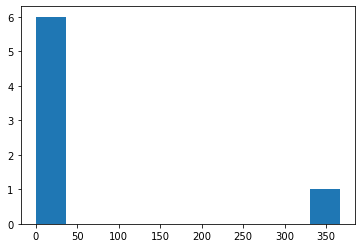

In [340]:
plt.hist(counts)